## Practical Work 4

### Auther : Fatema Samir Ahmed
### Date : 8/3/2022 --- Last Version ---

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -1
b = 2
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

#### Plot your data points. 

<function matplotlib.pyplot.show(*args, **kw)>

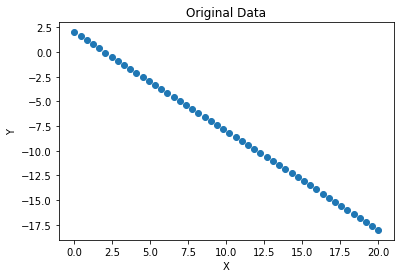

In [3]:
# Draw Original Data 
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

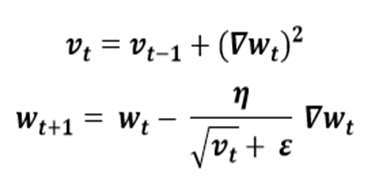

In [4]:
# --- Adagrad optimization algorithm GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @ z )/(2*len(X))


def Adagrad_GD_single( X, Y, alpha, Epsilon, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    V_0, V_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update veta_0 and veta_1 of Adagrad 
        V_0 =  V_0 +( GR_theta0**2)
        V_1 =  V_1 + (GR_theta1**2)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - (alpha/(np.sqrt(V_0)+Epsilon))*GR_theta0
        Theta_1 = Theta_1 -( alpha/(np.sqrt(V_1)+Epsilon))*GR_theta1
        epoch +=1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            break
    
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val,  epoch


In [5]:
Epsilon = 0.0000001
alpha = 0.1
iteration = 100
Theta_0_Ada, Theta_1_Ada, loss_Ada ,  epo = Adagrad_GD_single( X, Y, alpha, Epsilon, iteration) 
Y_hat = Theta_0_Ada[-1] + Theta_1_Ada[-1]*X
print(Y_hat)
print(epo,len(loss_Ada))

[ -0.53245175  -0.86000107  -1.18755039  -1.51509971  -1.84264903
  -2.17019835  -2.49774767  -2.82529699  -3.15284631  -3.48039563
  -3.80794495  -4.13549427  -4.46304359  -4.79059291  -5.11814223
  -5.44569156  -5.77324088  -6.1007902   -6.42833952  -6.75588884
  -7.08343816  -7.41098748  -7.7385368   -8.06608612  -8.39363544
  -8.72118476  -9.04873408  -9.3762834   -9.70383272 -10.03138204
 -10.35893136 -10.68648069 -11.01403001 -11.34157933 -11.66912865
 -11.99667797 -12.32422729 -12.65177661 -12.97932593 -13.30687525
 -13.63442457 -13.96197389 -14.28952321 -14.61707253 -14.94462185
 -15.27217117 -15.59972049 -15.92726981 -16.25481914 -16.58236846]
100 101


In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2 for Adagrad optimization algorithm GD for single variable  ",r2)

r2 for Adagrad optimization algorithm GD for single variable   0.9520364608741186


#### Plot loss vs. epochs for Adagrad optimization algorithm GD for single variable

<function matplotlib.pyplot.show(*args, **kw)>

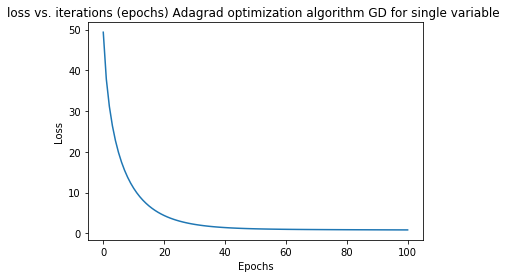

In [7]:
plt.plot( np.arange(epo+1),loss_Ada)
plt.title('loss vs. iterations (epochs) Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

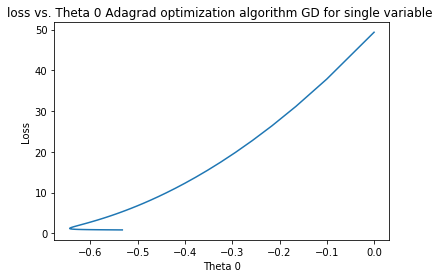

In [8]:
plt.plot(Theta_0_Ada,loss_Ada)
plt.title('loss vs. Theta 0 Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

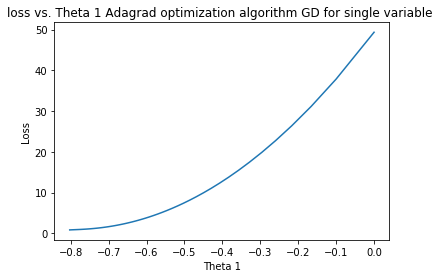

In [9]:
plt.plot(Theta_1_Ada,loss_Ada)
plt.title('loss vs. Theta 1 Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

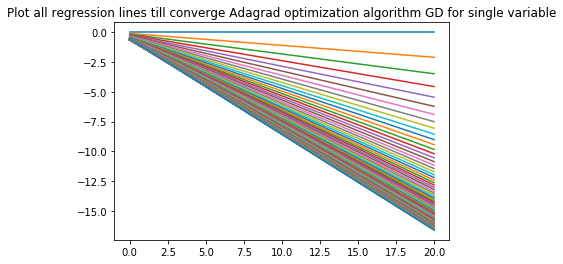

In [10]:
for theta0 , theta1 in zip(Theta_0_Ada,Theta_1_Ada):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Adagrad optimization algorithm GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

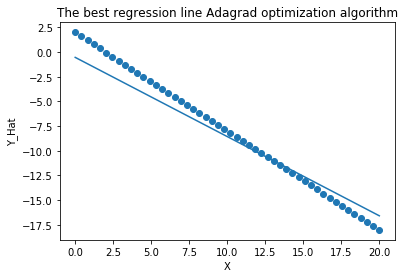

In [11]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Adagrad optimization algorithm')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

# look we will use another learning rate greate than last learning rate

In [12]:
Epsilon = 0.0000001
alpha = 0.3 
iteration = 1000
Theta_0_Ada, Theta_1_Ada, loss_Ada ,  epo = Adagrad_GD_single( X, Y, alpha, Epsilon, iteration) 
Y_hat = Theta_0_Ada[-1] + Theta_1_Ada[-1]*X
print(Y_hat)
print(epo,len(loss_Ada))

[  1.23149635   0.84719191   0.46288746   0.07858301  -0.30572144
  -0.69002589  -1.07433034  -1.45863478  -1.84293923  -2.22724368
  -2.61154813  -2.99585258  -3.38015702  -3.76446147  -4.14876592
  -4.53307037  -4.91737482  -5.30167926  -5.68598371  -6.07028816
  -6.45459261  -6.83889706  -7.22320151  -7.60750595  -7.9918104
  -8.37611485  -8.7604193   -9.14472375  -9.52902819  -9.91333264
 -10.29763709 -10.68194154 -11.06624599 -11.45055043 -11.83485488
 -12.21915933 -12.60346378 -12.98776823 -13.37207267 -13.75637712
 -14.14068157 -14.52498602 -14.90929047 -15.29359492 -15.67789936
 -16.06220381 -16.44650826 -16.83081271 -17.21511716 -17.5994216 ]
198 199


In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2 for Adagrad optimization algorithm GD for single variable  ",r2)

r2 for Adagrad optimization algorithm GD for single variable   0.9956076649298133


<function matplotlib.pyplot.show(*args, **kw)>

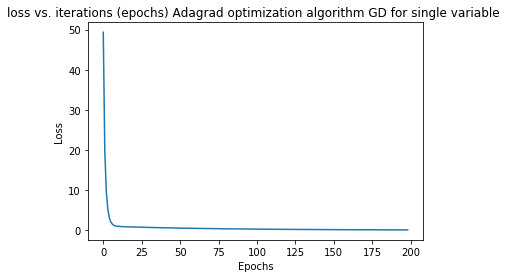

In [14]:
plt.plot( np.arange(epo+1),loss_Ada)
plt.title('loss vs. iterations (epochs) Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

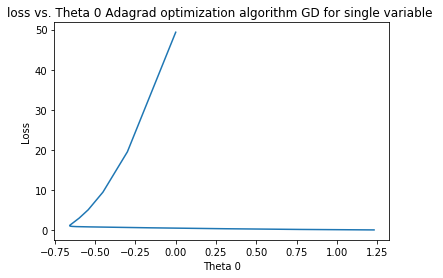

In [15]:
plt.plot(Theta_0_Ada,loss_Ada)
plt.title('loss vs. Theta 0 Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

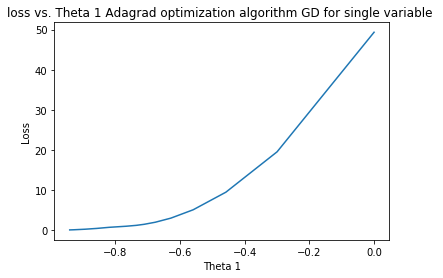

In [16]:
plt.plot(Theta_1_Ada,loss_Ada)
plt.title('loss vs. Theta 1 Adagrad optimization algorithm GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

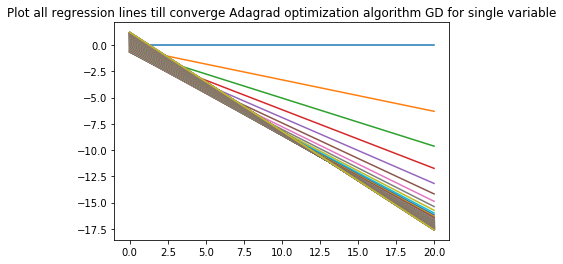

In [17]:
for theta0 , theta1 in zip(Theta_0_Ada,Theta_1_Ada):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Adagrad optimization algorithm GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

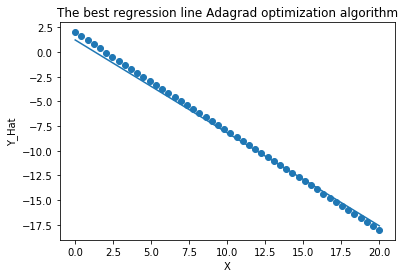

In [18]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Adagrad optimization algorithm')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

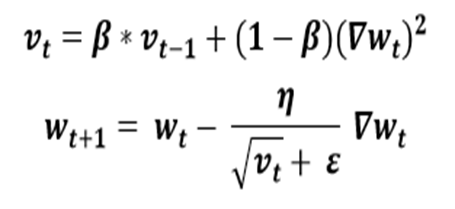

In [19]:
# --- RMSProp GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @ z )/(2*len(X))


def RMSProp_GD_single( X, Y,alpha, beta, Epsilon, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    V_0, V_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update veta_0 and veta_1 of RMSProp 
        V_0 = beta*V_0 +(1-beta)*( GR_theta0**2)
        V_1 =  beta*V_1 + (1-beta)*(GR_theta1**2)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - (alpha/(np.sqrt(V_0+Epsilon)))*GR_theta0
        Theta_1 = Theta_1 -( alpha/(np.sqrt(V_1+Epsilon)))*GR_theta1
        epoch +=1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            break
    
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val,  epoch


In [20]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -1
b = 2
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

In [21]:
Epsilon = 0.0000001
beta = 0.9
alpha = .1
iteration = 1000
Theta_0_RMSProp, Theta_1_RMSProp, loss_RMSProp ,  epo = RMSProp_GD_single( X, Y,alpha, beta, Epsilon, iteration) 
Y_hat = Theta_0_RMSProp[-1] + Theta_1_RMSProp[-1]*X
print(Y_hat)
print(epo,len(loss_RMSProp))

[  1.89891101   1.49480604   1.09070106   0.68659608   0.2824911
  -0.12161387  -0.52571885  -0.92982383  -1.33392881  -1.73803378
  -2.14213876  -2.54624374  -2.95034872  -3.35445369  -3.75855867
  -4.16266365  -4.56676863  -4.9708736   -5.37497858  -5.77908356
  -6.18318854  -6.58729351  -6.99139849  -7.39550347  -7.79960845
  -8.20371342  -8.6078184   -9.01192338  -9.41602836  -9.82013333
 -10.22423831 -10.62834329 -11.03244827 -11.43655324 -11.84065822
 -12.2447632  -12.64886818 -13.05297315 -13.45707813 -13.86118311
 -14.26528809 -14.66939306 -15.07349804 -15.47760302 -15.881708
 -16.28581297 -16.68991795 -17.09402293 -17.4981279  -17.90223288]
74 75


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2 for RMSProp GD for single variable  ",r2)

r2 for RMSProp GD for single variable   0.9999010611101411


<function matplotlib.pyplot.show(*args, **kw)>

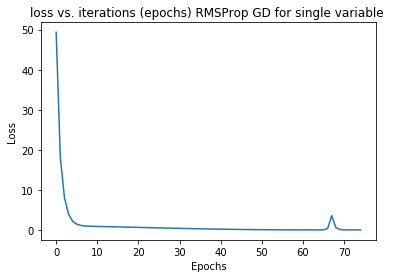

In [23]:
plt.plot( np.arange(epo+1),loss_RMSProp)
plt.title('loss vs. iterations (epochs) RMSProp GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

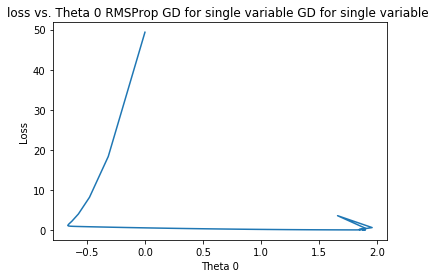

In [24]:
plt.plot(Theta_0_RMSProp,loss_RMSProp)
plt.title('loss vs. Theta 0 RMSProp GD for single variable GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

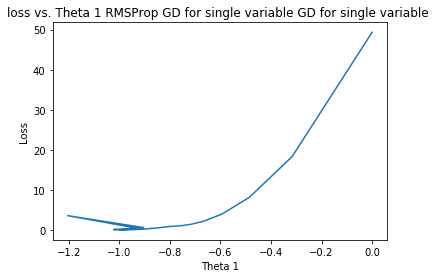

In [25]:
plt.plot(Theta_1_RMSProp,loss_RMSProp)
plt.title('loss vs. Theta 1 RMSProp GD for single variable GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

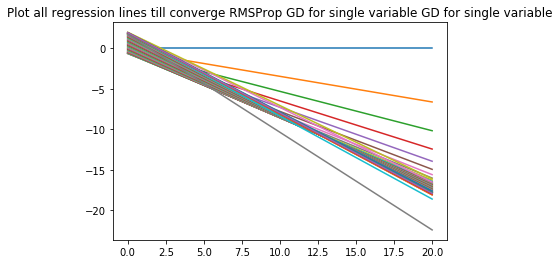

In [26]:
for theta0 , theta1 in zip(Theta_0_RMSProp,Theta_1_RMSProp):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge RMSProp GD for single variable GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

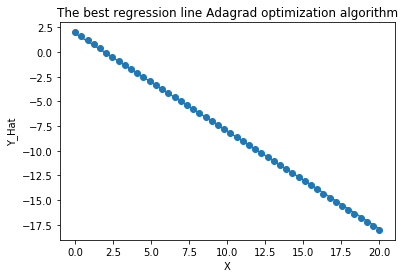

In [27]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Adagrad optimization algorithm')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

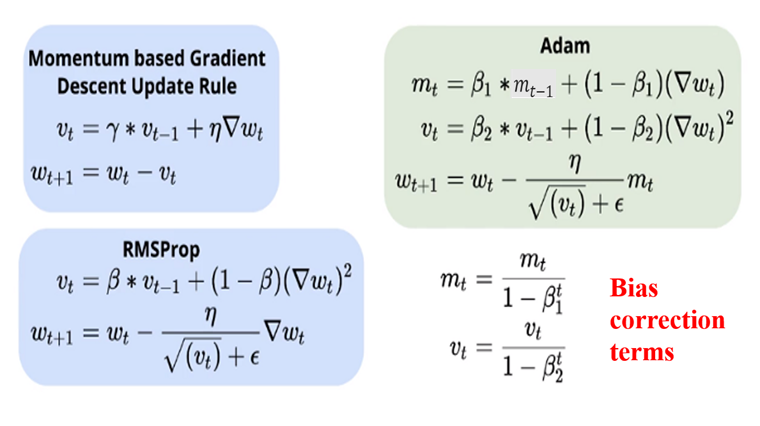

In [28]:
# --- RMSProp GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @ z )/(2*len(X))


def Adam_GD_single( X, Y,alpha, beta_1,beta_2, Epsilon, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    V_0, V_1, M_0, M_1= 0, 0, 0, 0
    # baise correction term 
    V_0_hat, V_1_hat, M_0_hat, M_1_hat= 0, 0, 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update veta_0 and veta_1 of Adam
        
        M_0 = beta_1*M_0 +(1-beta_1)*( GR_theta0)
        M_1 =  beta_1*M_1 + (1-beta_1)*(GR_theta1)
        
        V_0 = beta_2*V_0 +(1-beta_2)*( GR_theta0**2)
        V_1 =  beta_2*V_1 + (1-beta_2)*(GR_theta1**2)
        
        # Bais Correction Terms
        M_0_hat =  M_0 / (1-beta_1**(i+1))
        M_1_hat =  M_1 / (1-beta_1**(i+1))
        
        V_0_hat =  V_0 / (1-beta_2**(i+1))
        V_1_hat =  V_1 / (1-beta_2**(i+1))

        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - (alpha/(np.sqrt(V_0_hat)+Epsilon))*M_0_hat
        Theta_1 = Theta_1 -( alpha/(np.sqrt(V_1_hat)+Epsilon))*M_1_hat
        epoch +=1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            break
    
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val,  epoch


In [29]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -1
b = 2
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

In [38]:
Epsilon = 0.0000001
beta_1= 0.6
beta_2= 0.5
alpha = 0.1
iteration = 1000
Theta_0_Adam, Theta_1_Adam, loss_Adam ,  epo = Adam_GD_single( X, Y,alpha, beta_1,beta_2, Epsilon, iteration)
Y_hat = Theta_0_Adam[-1] + Theta_1_Adam[-1]*X
print(Y_hat)
print(epo,len(loss_Adam))

[  2.01975316   1.61965254   1.21955191   0.81945128   0.41935065
   0.01925002  -0.38085061  -0.78095124  -1.18105187  -1.5811525
  -1.98125313  -2.38135376  -2.78145439  -3.18155502  -3.58165565
  -3.98175628  -4.38185691  -4.78195754  -5.18205817  -5.58215879
  -5.98225942  -6.38236005  -6.78246068  -7.18256131  -7.58266194
  -7.98276257  -8.3828632   -8.78296383  -9.18306446  -9.58316509
  -9.98326572 -10.38336635 -10.78346698 -11.18356761 -11.58366824
 -11.98376887 -12.3838695  -12.78397012 -13.18407075 -13.58417138
 -13.98427201 -14.38437264 -14.78447327 -15.1845739  -15.58467453
 -15.98477516 -16.38487579 -16.78497642 -17.18507705 -17.58517768]
92 93


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2 for  Adam GD for single variable  ",r2)

r2 for  Adam GD for single variable   0.9982489278420723


<function matplotlib.pyplot.show(*args, **kw)>

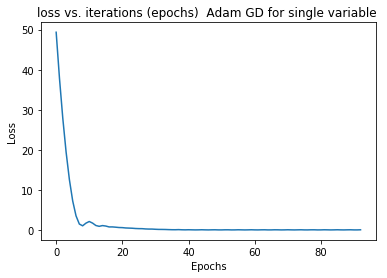

In [40]:
plt.plot( np.arange(epo+1),loss_Adam)
plt.title('loss vs. iterations (epochs)  Adam GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

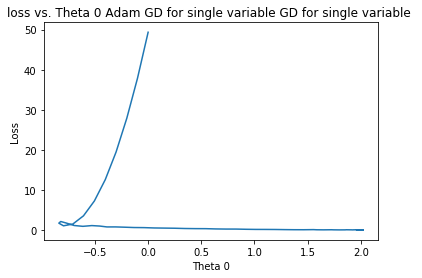

In [41]:
plt.plot(Theta_0_Adam,loss_Adam)
plt.title('loss vs. Theta 0 Adam GD for single variable GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

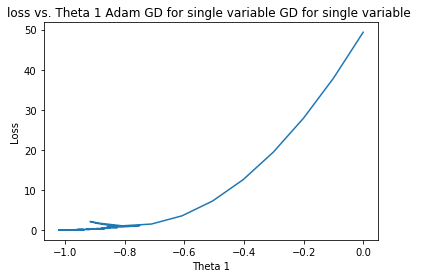

In [42]:
plt.plot(Theta_1_Adam,loss_Adam)
plt.title('loss vs. Theta 1 Adam GD for single variable GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

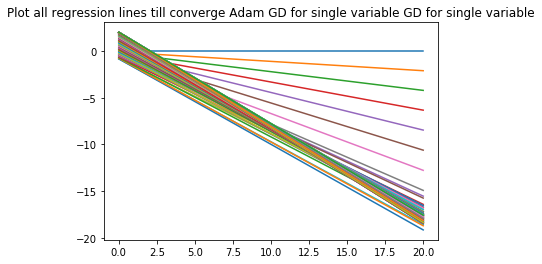

In [43]:
for theta0 , theta1 in zip(Theta_0_Adam,Theta_1_Adam):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Adam GD for single variable GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

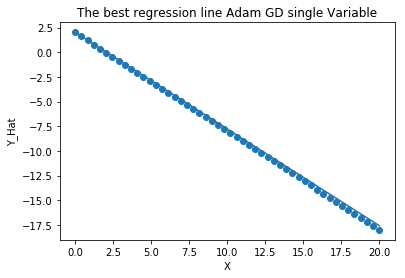

In [44]:
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Adam GD single Variable')
plt.xlabel('X')
plt.ylabel('Y_Hat')
plt.show

## Congratulations 
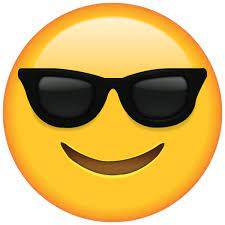